<a href="https://colab.research.google.com/github/sumedhasjs/Machine-Learning-Laboratory/blob/main/LabEval_BT19ECE107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Opening location of Dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd 'gdrive/MyDrive/ML Lab Datasets'

/content/gdrive/MyDrive/ML Lab Datasets


# Importing the Required libraries

In [223]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score 
import tensorflow as tf
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torch import optim
from tqdm import tqdm
import random
import math
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay

# **Importing and Preprocessing the dataset**

In [5]:
data=pd.read_csv('diagnosis.csv')

In [8]:
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,diagnosis
0,87139402,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771,0
1,8910251,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587,0
2,905520,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881,0
3,868871,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784,0
4,9012568,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766,0


In [27]:
data_x= data.iloc[: , 1:-1]
data_x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [28]:
data_y=data.iloc[:,-1:]
data_y.head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


In [40]:
test_ratio=0.4
train_ratio=0.6

In [113]:
Train_x, Test_x, Train_y, Test_y = train_test_split(data_x,data_y,test_size=test_ratio,train_size=train_ratio,shuffle=True)

In [114]:
Train_x.shape, Test_x.shape, Train_y.shape, Test_y.shape

((341, 30), (228, 30), (341, 1), (228, 1))

In [189]:
class ArtificialNeuralNetwork(nn.Module):
  def __init__(self):
    super(ArtificialNeuralNetwork,self).__init__()
    self.linear_relu_stack=nn.Sequential(
        nn.Linear(30,128),
        nn.ReLU(),
        nn.Linear(128,128),
        nn.ReLU(),
        nn.Linear(128,1)
    )

  def forward(self,x):
    logits=self.linear_relu_stack(x)
    logits=torch.sigmoid(logits)
    return logits

In [190]:
type(Train_x)

pandas.core.frame.DataFrame

In [191]:

train_x=Train_x.to_numpy()
test_x=Test_x.to_numpy()
#val_x=Validation_x.to_numpy()

train_y=Train_y.to_numpy()
test_y=Test_y.to_numpy()
#val_y=Validation_y.to_numpy()

In [192]:
type(train_x)

numpy.ndarray

In [193]:
train_x.shape

(341, 30)

In [194]:
train_x=torch.from_numpy(train_x.astype(np.float32))
test_x=torch.from_numpy(test_x.astype(np.float32))
train_y=torch.from_numpy(train_y.astype(np.float32))
test_y=torch.from_numpy(test_y.astype(np.float32))

In [195]:
train_dataloader=DataLoader(train_x,batch_size=5,shuffle=True)
test_dataloader=DataLoader(test_x,batch_size=5,shuffle=True)

In [206]:
model=ArtificialNeuralNetwork()
epochs_num=10
criterion = nn.BCELoss()
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [207]:
train_accuracy= []
for epoch in range(epochs_num):
    y_pred = model(train_x)
    loss = criterion(y_pred, train_y)
    y_predicted_cls = y_pred.round()
    acc = y_predicted_cls.eq(train_y).sum() / float(train_y.shape[0])
    
    train_accuracy.append(acc)

    loss.backward()
    optimizer.step()

    optimizer.zero_grad()

    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}, accuracy = {acc}')

epoch: 1, loss = 16.1532, accuracy = 0.35777124762535095
epoch: 2, loss = 12.2570, accuracy = 0.35777124762535095
epoch: 3, loss = 7.5382, accuracy = 0.35777124762535095
epoch: 4, loss = 6.1896, accuracy = 0.35777124762535095
epoch: 5, loss = 4.8239, accuracy = 0.35777124762535095
epoch: 6, loss = 3.6954, accuracy = 0.35777124762535095
epoch: 7, loss = 2.8120, accuracy = 0.35777124762535095
epoch: 8, loss = 1.9532, accuracy = 0.35777124762535095
epoch: 9, loss = 1.1689, accuracy = 0.37829911708831787
epoch: 10, loss = 0.5956, accuracy = 0.6392961740493774


In [208]:
with torch.no_grad():
    y_predicted = model(test_x)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(test_y).sum() / float(test_y.shape[0])
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.6930


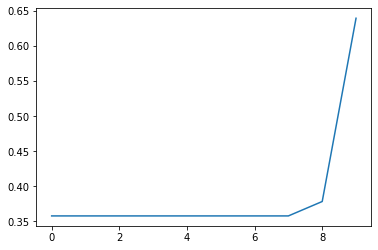

In [209]:
plt.plot(train_accuracy)

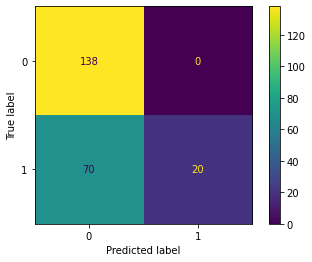

Sensitivity :  1.0
Specificity :  0.2222222222222222


In [210]:
cm = confusion_matrix(test_y, y_predicted.round())
disp_rbf = ConfusionMatrixDisplay(cm)
disp_rbf.plot()
plt.show()

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

In [211]:
print('AUROC Score: ',roc_auc_score(test_y, y_predicted.round()))

AUROC Score:  0.6111111111111112


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


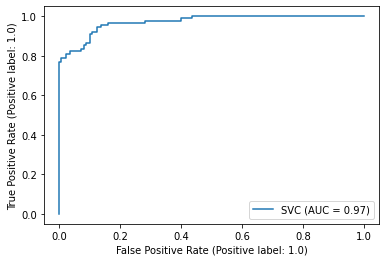

In [224]:
svc = SVC(random_state=42)
svc.fit(train_x, train_y)

svc_disp = RocCurveDisplay.from_estimator(svc, test_x, test_y)